<a href="https://colab.research.google.com/github/prateekbps/DataScience/blob/main/Adv_AI(MNIST)_19_July.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# #Steps
# 1. Import required libraries
# 2.Load dataset
# 3.Preproces the data
# 4. Define the model -Sequential or functional architecture
# 5.Compile the Model
# 6.Fit the model
# 7.Evaluate the model

In [ ]:
# Importing the required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')


# Deep learning packages-Tensorflow and keras
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.17.1
3.5.0


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout , BatchNormalization
# from keras.utils import np_utils

In [ ]:
from keras.datasets import mnist

In [ ]:
# Load and explore the data

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
print("Number of training examples :", x_train.shape[0], "and each image is of the shape (%d, %d)"%(x_train.shape[1], x_train.shape[2]))
print("Number of testing examples :", x_test.shape[0], "and each image is of the shape (%d, %d)"%(x_test.shape[1], x_test.shape[2]))

Number of training examples : 60000 and each image is of the shape (28, 28)
Number of testing examples : 10000 and each image is of the shape (28, 28)


In [ ]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

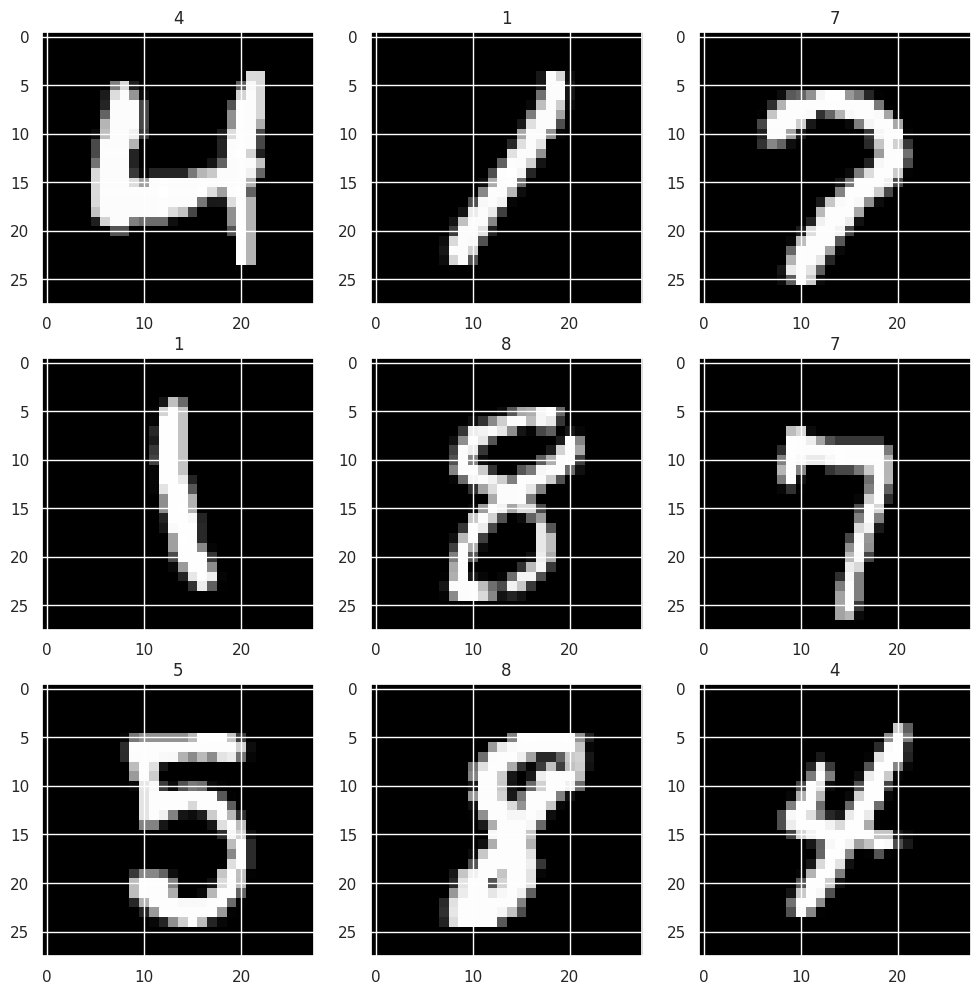

In [ ]:
plt.figure(figsize=(12,12))
np.random.seed(0)
idx = np.random.randint(0,60000,9)

for i in range(len(idx)):
  plt.subplot(3,3,i+1)
  plt.title(y_train[idx[i]])
  grid_data = np.reshape(x_train[idx[i]], (28,28))
  plt.imshow(grid_data, cmap='gray')

plt.show()

In [ ]:
# Data Preprocessing
# we observed that the above matrix where each cell is having a value between 0 to 255
# before we move to apply the deep neural network or sallow neural network, first step to normallize the data
# X -> (X-X.min()/X.max()-X.min())

x_train = x_train/255.0
x_test = x_test/255.0

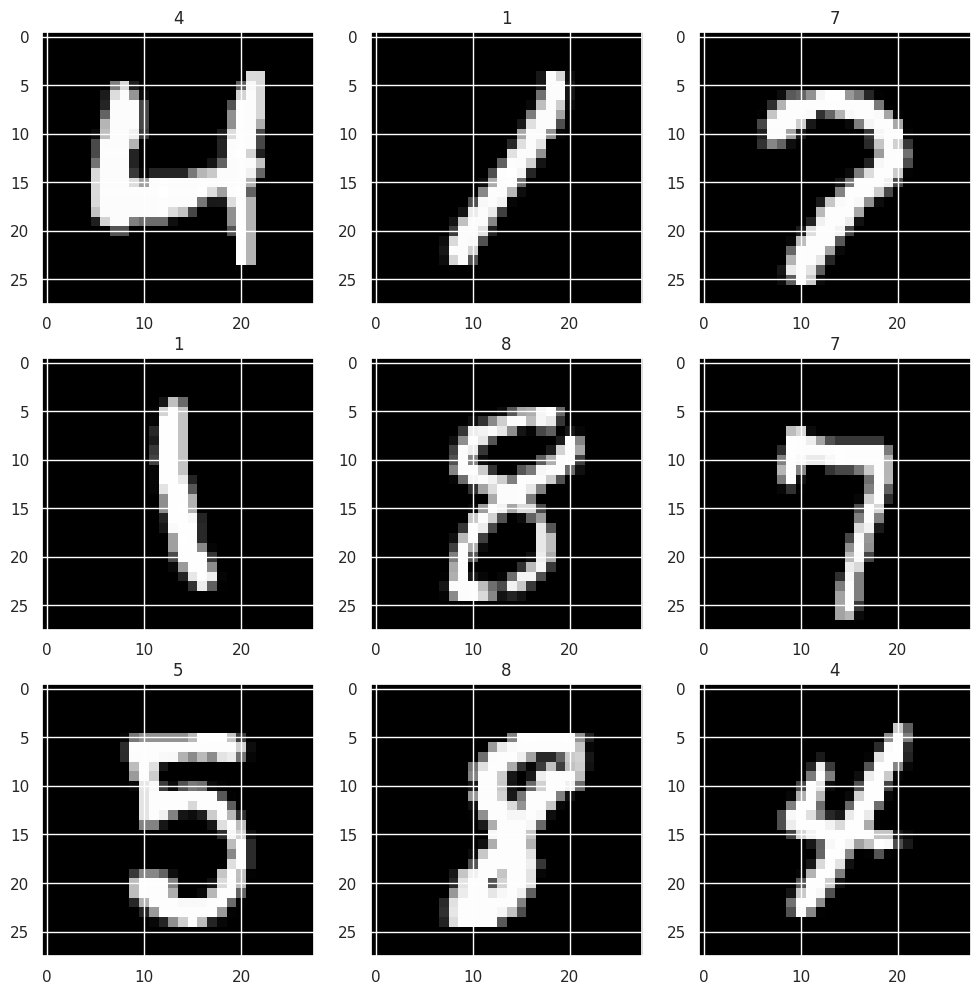

In [ ]:
plt.figure(figsize=(12,12))
np.random.seed(0)
idx = np.random.randint(0,60000,9)

for i in range(len(idx)):
  plt.subplot(3,3,i+1)
  plt.title(y_train[idx[i]])
  grid_data = np.reshape(x_train[idx[i]], (28,28))
  plt.imshow(grid_data, cmap='gray')

plt.show()

In [ ]:
x_train_o = x_train
x_test_o = x_test

In [ ]:
x_train_o.shape

(60000, 28, 28)

In [ ]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype('float64')
x_test = x_test.astype('float64')

# print final input shape ready for training
print("Train Matrix Shape: ", x_train.shape)
print("Test Matrix Shape: ", x_test.shape)

Train Matrix Shape:  (60000, 784)
Test Matrix Shape:  (10000, 784)


In [ ]:
pd.DataFrame(y_train).value_counts()

,count
0,
1,6742
7,6265
3,6131
2,5958
9,5949
0,5923
6,5918
8,5851
4,5842


In [ ]:
# Here we are having a class number for each image
print("Class label of first image: ", y_train[0])

# Lets convert into a 10 dimensional vector or 10 class categorical values
# example : consider an image is 5 convert it into 5 => [0,0,0,0,1,0,0,0,0,0]
# This conversion is needed for multilater perceptron

y_train1 = keras.utils.to_categorical(y_train,10)
y_test1 = keras.utils.to_categorical(y_test,10)

print("After converting the output into a vector: ", y_train[0])

Class label of first image:  5
After converting the output into a vector:  5


In [ ]:
y_train1 = keras.utils.to_categorical(y_train)
y_test1 = keras.utils.to_categorical(y_test)

In [ ]:
y_train1.shape

(60000, 10)

In [ ]:
# softmax classifier
model = None
model = Sequential()
model.add(Dense(128, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Fit the model
model.fit(x_train, y_train1, epochs=10, batch_size=128, validation_data=(x_test,y_test1))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8245 - loss: 0.6280 - val_accuracy: 0.9463 - val_loss: 0.1874
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9518 - loss: 0.1735 - val_accuracy: 0.9636 - val_loss: 0.1299
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9658 - loss: 0.1185 - val_accuracy: 0.9671 - val_loss: 0.1150
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9737 - loss: 0.0939 - val_accuracy: 0.9729 - val_loss: 0.0916
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9804 - loss: 0.0692 - val_accuracy: 0.9720 - val_loss: 0.0892
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9827 - loss: 0.0614 - val_accuracy: 0.9740 - val_loss: 0.0845
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9865 - loss: 0.0481 - val_accuracy: 0.9763 - val_loss: 0.0796
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9883 - loss: 0.0418 - val_accuracy: 0.

In [ ]:
prediction_score_train = model.evaluate(x_train,y_train1, verbose=0)
print("Train loss and train accuracy: ", prediction_score_train)
print()
prediction_score_test = model.evaluate(x_test,y_test1, verbose=0)
print("Test loss and test accuracy: ", prediction_score_test)

Train loss and train accuracy:  [0.023085419088602066, 0.9948999881744385]

Test loss and test accuracy:  [0.07259154319763184, 0.9782999753952026]


In [ ]:
# Parameter-Weight initialization, Drop out , Batch Normalization

In [ ]:
#1.12
# DEFINE THE MODEL
model1 = None
model1 = Sequential()

# Fully connected layer
# first hidden layer
model1.add(Dense(512, input_dim=784, activation='relu', kernel_initializer='he_normal'))
model1.add(BatchNormalization())
model1.add(Dropout(0.3))

# second hidden layer
model1.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model1.add(BatchNormalization())
model1.add(Dropout(0.3))

# Output layer
model1.add(Dense(10, activation='softmax'))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.fit(x_train, y_train1, epochs=10, batch_size=128, validation_data=(x_test,y_test1))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.8575 - loss: 0.4614 - val_accuracy: 0.9642 - val_loss: 0.1127
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9592 - loss: 0.1289 - val_accuracy: 0.9682 - val_loss: 0.1001
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9708 - loss: 0.0928 - val_accuracy: 0.9758 - val_loss: 0.0770
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9745 - loss: 0.0779 - val_accuracy: 0.9775 - val_loss: 0.0676
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9773 - loss: 0.0675 - val_accuracy: 0.9796 - val_loss: 0.0658
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9812 - loss: 0.0571 - val_accuracy: 0.9813 - val_loss: 0.0616
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9835 - loss: 0.0509 - val_accuracy: 0.9816 - val_loss: 0.0602
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9850 - loss: 0.0455 - val_

In [ ]:
print(x_train_o.shape, x_test_o.shape)

(60000, 28, 28) (10000, 28, 28)


In [ ]:
# Flatten

In [ ]:
#1.12
# DEFINE THE MODEL
model2 = None
model2 = Sequential()

model2.add(Flatten(input_shape=(28,28)))
# Fully connected layer
# first hidden layer
model2.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))

# second hidden layer
model2.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))

# Output layer
model2.add(Dense(10, activation='softmax'))
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit(x_train_o, y_train1, epochs=10, batch_size=128, validation_data=(x_test_o,y_test1))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.8560 - loss: 0.4719 - val_accuracy: 0.9657 - val_loss: 0.1112
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9601 - loss: 0.1306 - val_accuracy: 0.9734 - val_loss: 0.0832
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9689 - loss: 0.0969 - val_accuracy: 0.9760 - val_loss: 0.0751
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9755 - loss: 0.0810 - val_accuracy: 0.9795 - val_loss: 0.0632
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9793 - loss: 0.0641 - val_accuracy: 0.9782 - val_loss: 0.0699
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.9817 - loss: 0.0575 - val_accuracy: 0.9784 - val_loss: 0.0690
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9836 - loss: 0.0514 - val_accuracy: 0.9804 - val_loss: 0.0655
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9850 - loss: 0.0465 - va

In [ ]:
# prediction_score_train = model.evaluate(x_train_o,y_train1, verbose=0)
# print("Train loss and train accuracy: ", prediction_score_train)
# print()
# prediction_score_test = model.evaluate(x_test_o,y_test1, verbose=0)
# print("Test loss and test accuracy: ", prediction_score_test)